## Exemplo Prático de Classificação em Python

In [1]:
# Configuração para não exibir ow warnings

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine #para importar o dataset wine
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste(holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.metrics import accuracy_score # para a exibição da acurácia do modelo
from sklearn.linear_model import LogisticRegression # algoritmo regressão logística
from sklearn.neighbors import KNeighborsClassifier # algoritmo KNN
from sklearn.tree import DecisionTreeClassifier # algoritmo árvore de classificação
from sklearn.naive_bayes import GaussianNB # algoritmo Naive Bayes
from sklearn.svm import SVC # algoritmo SVM

In [3]:
# Carga do dataset
wine = load_wine()
dataset = pd.DataFrame(wine.data, columns = wine.feature_names) # conversão para dataframe
dataset['target'] = wine.target # adição da coluna target

# Separação em bases de treino e teste (holdout)
array = dataset.values
X = array[:, 0:13] # atributos
y = array[:, 13] # classe (target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 7) # faz a divisão

# Definindo a métrica de avaliação dos algoritmos
scoring = 'accuracy'

# Criando os folds para a validação cruzada
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits = num_particoes, shuffle = True, random_state = 7) # faz o particionamento em 10 folds

LR: 0.936667 (0.048564)
KNN: 0.675238 (0.087929)
CART: 0.880476 (0.055183)
NB: 0.971429 (0.047380)
SVM: 0.683333 (0.078282)


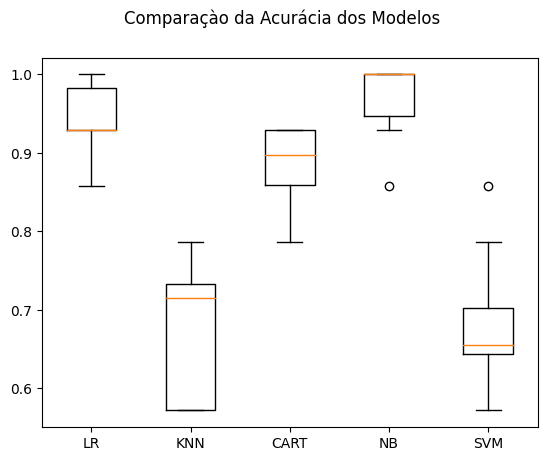

In [4]:
# Modelagem 

# Definindo uma seed global para esta célula de código
np.random.seed(7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []


# Preparando os modelos e adicionando-os em uma lista
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Avaliando um modelo por vez
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv = kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparaçào da Acurácia dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [5]:
# Criando um modelo com todo o conjunto de treino 
model = GaussianNB()
model.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test)

# Estimando a acurácia no conjunto de teste
print(accuracy_score(y_test, predictions))

1.0
